In [15]:
# !pip install -r requirements.txt

In [16]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader

In [17]:
chroma_client = chromadb.PersistentClient(path='vectordb')

image_loader = ImageLoader()

multimodal_ef = OpenCLIPEmbeddingFunction()

multimodal_db = chroma_client.get_or_create_collection(name='multimodal_db', embedding_function=multimodal_ef, data_loader=image_loader)

In [47]:
multimodal_db.update(
    #id for each of the images in the image folder
    ids=['1', '2', '3', '4', '5', '6', '7', '8'],
    uris=['images/car1.jpg', 'images/car2.jpg', 'images/car3.jpg', 'images/dog1.jpg', 'images/dog2.jpg', 'images/plane1.jpg', 'images/plane2.jpg', 'images/rose1.jpg'],
    metadatas=[
        {"img_id":"1",  "img_category": 'vehical', "item_name": 'car1'},
        {"img_id":"2",  "img_category": 'vehical', "item_name": 'car2'},
        {"img_id":"3",  "img_category": 'vehical', "item_name": 'car3'},
        {"img_id":"4",  "img_category": 'animal', "item_name": 'dog1'},
        {"img_id":"5",  "img_category": 'animal', "item_name": 'dog2'},
        {"img_id":"6",  "img_category": 'vehical', "item_name": 'plane1'},
        {"img_id":"7",  "img_category": 'vehical', "item_name": 'plane2'},
        {"img_id":"8",  "img_category": 'plant', "item_name": 'rose1'}
    ]
)

In [48]:
multimodal_db.count()

8

In [49]:
result = multimodal_db.query(
    query_texts= ['blue car'],
    n_results=3,
    include=['documents', 'distances', 'metadatas', 'data', 'uris']
)

result

{'ids': [['3', '2', '1']],
 'distances': [[1.4569121418681967, 1.4690887878175567, 1.5332027349728288]],
 'metadatas': [[{'img_category': 'vehical',
    'img_id': '3',
    'item_name': 'car3'},
   {'img_category': 'vehical', 'img_id': '2', 'item_name': 'car2'},
   {'img_category': 'vehical', 'img_id': '1', 'item_name': 'car1'}]],
 'embeddings': None,
 'documents': [[None, None, None]],
 'uris': [['images/car3.jpg', 'images/car2.jpg', 'images/car1.jpg']],
 'data': [[array([[[151, 158, 164],
           [150, 157, 163],
           [149, 156, 162],
           ...,
           [117, 130, 146],
           [116, 128, 144],
           [115, 127, 143]],
   
          [[147, 154, 160],
           [147, 154, 160],
           [146, 153, 159],
           ...,
           [129, 139, 151],
           [130, 138, 151],
           [130, 138, 151]],
   
          [[147, 152, 156],
           [147, 152, 156],
           [146, 151, 155],
           ...,
           [149, 152, 159],
           [153, 153, 161],

In [50]:
import matplotlib.pyplot as plt

def print_query_results(query_list:list, query_results:dict)->None:
    result_count = len(query_results['ids'][0])


    for i in range(len(query_list)):
        print(f'Result for query: {query_list[i]}')

        for j in range(result_count):
            id = query_results['ids'][i][j]
            distance = query_results['distances'][i][j]
            data = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri = query_results['uris'][i][j]

            print(f'ID: {id}, Distance: {distance}, Document: {document}, Metadata: {metadata}, URI: {uri}')

            #display the image
            plt.imshow(data)
            plt.axis('off')
            plt.show()

Result for query: plane
ID: 8, Distance: 1.589548817960959, Document: None, Metadata: {'img_category': 'plant', 'img_id': '8', 'item_name': 'rose1'}, URI: images/rose1.jpg


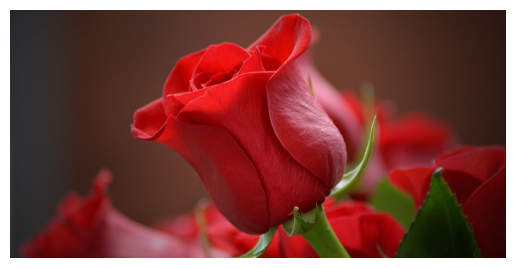

ID: 4, Distance: 1.6116155015589926, Document: None, Metadata: {'img_category': 'animal', 'img_id': '4', 'item_name': 'dog1'}, URI: images/dog1.jpg


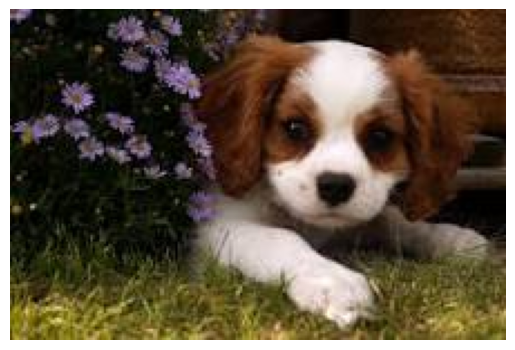

ID: 5, Distance: 1.621553379518941, Document: None, Metadata: {'img_category': 'animal', 'img_id': '5', 'item_name': 'dog2'}, URI: images/dog2.jpg


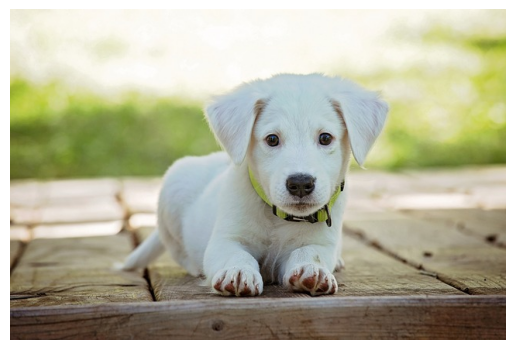

In [57]:
quary_text = ['plane']

result = multimodal_db.query(
    query_texts= quary_text,
    n_results=3,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category': {'$ne':'vehical'}}
)

print_query_results(quary_text, result)